In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = '/usr/lib/jvm/java-8-openjdk-amd64'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=c2cde1bf2730ce53ba04771917d4d5491d20e39063dd92c94c794e583a4fec35
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [ ]:
import pandas as pd  #python libary for reading data in tabel
import numpy as np #bumerical python-process numerical data
import matplotlib.pyplot as plt #libary plots
import pyspark
from pyspark.sql import * #importing pyspark
from pyspark.sql.types import * #from pyspark importing sql libraries
from pyspark.sql.functions import *
from pyspark import SparkContext,SparkConf
from pyspark.sql.functions import col,skewness,kurtosis #libary for skewness and kurtosis
from pyspark.sql import SparkSession
%matplotlib inline

In [ ]:
#create the session
conf = SparkConf().set("spark.ui.port","4050")

#create the context
sc = pyspark.SparkContext
spark = SparkSession.builder.getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
#b) load the diabetes data.
df =spark.read.format("csv").option("header","true").load("diabetes.csv")


In [ ]:
#d) Read the code and print the schema of the diabetes data
df.show(8)
df.printSchema()

+-----------+-------+-------------+-------------+-------+----+--------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|Diabetes|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+--------+---+-------+
|          6|    148|           72|           35|      0|33.6|   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|   0.201| 30|      0|
|          3|     78|           50|           32|     88|  31|   0.248| 26|      1|
|         10|    115|            0|            0|      0|35.3|   0.134| 29|      0|
+-----------+-------+-------------+-------------+-------+----+--------+---+-

In [ ]:
#e) Describe and show Glucose, Blood Pressure and BMI cols
num_cols = ['Glucose','BloodPressure','BMI']
df.select(num_cols).describe().show()

+-------+-----------------+------------------+------------------+
|summary|          Glucose|     BloodPressure|               BMI|
+-------+-----------------+------------------+------------------+
|  count|              768|               768|               768|
|   mean|     120.89453125|       69.10546875|31.992578124999977|
| stddev|31.97261819513622|19.355807170644777| 7.884160320375441|
|    min|                0|                 0|                 0|
|    max|               99|                98|              67.1|
+-------+-----------------+------------------+------------------+



In [ ]:
#f) Calculate skewness and kurtosis of Glucose and Blood Pressure cols
df.select(skewness("Glucose"),kurtosis("BloodPressure")).show()

+------------------+-----------------------+
| skewness(Glucose)|kurtosis(BloodPressure)|
+------------------+-----------------------+
|0.1734139551998773|      5.138690662525448|
+------------------+-----------------------+



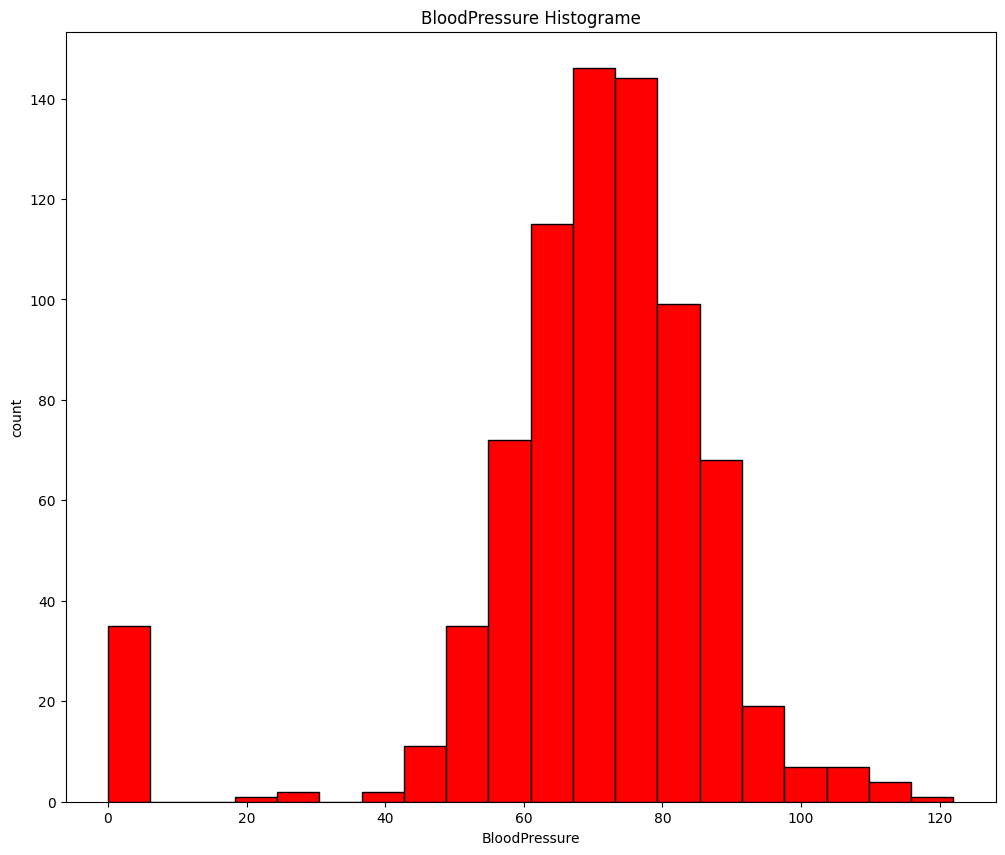

In [ ]:
#g) Create a histogram of Bloodpressure data
#(you can choose the number of bins, color and edge color)
spark = SparkSession.builder.appName("Histogram").getOrCreate()
data = spark.read.csv("diabetes.csv", header=True, inferSchema=True)
BloodPressuredata = data.select("BloodPressure")
pandas_df = BloodPressuredata.toPandas()

plt.figure(figsize=(12,10))
plt.hist(pandas_df["BloodPressure"], bins=20, color="red",edgecolor="black")
plt.xlabel("BloodPressure")
plt.ylabel("count")
plt.title("BloodPressure Histograme")
plt.show()
spark.stop()